# Data Cleaning

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

In [3]:
!pip install missingno

In [5]:
data = pd.read_csv('D:/fifa21.csv')
data.shape

(18541, 92)

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Real Face',
       'Release Clause', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'GK', 'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 

Let's first consider the features which may influence the model.



In [8]:
features = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves','International Reputation', 'Work Rate', 'Body Type', 
        'Position', 'Height', 'Weight', 'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve','FK Accuracy', 'Long Passing', 
        'Ball Control', 'Acceleration','Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
        'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression','Interceptions', 'Positioning', 
        'Vision', 'Penalties', 'Composure', 'Standing Tackle', 'Sliding Tackle', 
        'GK Diving','GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

In [9]:
df = data[features]
df.shape

(18541, 54)

In [10]:
# Cleaning the Value column
def clean_money(column):
    values = []
    for value in data[column].fillna(''):
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money/1000000)
    return values

# Cleaning Weight column
def clean_weight():
    weights = []
    for weight in data['Weight'].fillna(''):
        if weight != '':
            weights.append(int(weight[:-3]))
        else:
            weights.append(np.nan)
    return weights

# Cleaning Height Column
def clean_height():
    heights = []
    for height in data['Height'].fillna(''):
        if height != '':
            height =int(height[0])*12 + int(height[2])
            heights.append(height)
        else:
            heights.append(np.nan)
    return heights

# # Cleaning Release Clause
def clean_release_clause():
    release_clause = []
    for clause in data['Release Clause'].fillna(''):
        if clause == '':
            money=0.0
        elif clause[-1]=='M':
            money = 1000000
            money *= int(clause[1:-1])
        elif clause[-1]=='K':
            money = 1000
            money *= int(clause[1:-1])
        else: 
            money = 0
        release_clause.append(money/1000000)
    return release_clause

In [11]:
#Remove the # and run the below lines to clean the data:
data['Weight'] = clean_weight()
data['Height'] = clean_height()

In [13]:
data['Height']

0        69
1        73
2        73
3        69
4        61
         ..
18536    73
18537    65
18538    74
18539    61
18540    73
Name: Height, Length: 18541, dtype: int64

In [14]:
data['Release Clause']


0        13800000.0
1        65700000.0
2         4200000.0
3        45400000.0
4        42800000.0
            ...    
18536     1200000.0
18537           NaN
18538           NaN
18539           NaN
18540           NaN
Name: Release Clause, Length: 18541, dtype: float64

In [15]:
data['Wage']


0           500.0
1        150000.0
2          2000.0
3         50000.0
4        105000.0
           ...   
18536     15000.0
18537      6000.0
18538         0.0
18539     20000.0
18540      6000.0
Name: Wage, Length: 18541, dtype: float64

In [16]:
def clean_height():
    heights = []
    for height in data['Height'].fillna(''):
        if height != '':
            height =int(height[0])*12 + int(height[2])
            heights.append(height)
        else:
            heights.append(np.nan)
    return heights
#data['Height'] = clean_height()
data['Height']

0        69
1        73
2        73
3        69
4        61
         ..
18536    73
18537    65
18538    74
18539    61
18540    73
Name: Height, Length: 18541, dtype: int64

In [17]:
df.isna().sum()


Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        371
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
Weak Foot                     0
Skill Moves                   0
International Reputation      0
Work Rate                     0
Body Type                    51
Position                     25
Height                        0
Weight                        0
Likes                         0
Dislikes                      0
Following                     0
Crossing                    153
Finishing                   209
Heading Accuracy            133
Short Passing               220
Volleys                     163
Dribbling                   183
Curve                       120
FK Accuracy                  44
Long Passing                138
Ball Control                214
Accelera

In [18]:
numerical_features =['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Height',
                   'Weight', 'Likes', 'Dislikes','Following', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing',
                   'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
                    'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
                   'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                   'Composure', 'Standing Tackle', 'Sliding Tackle', 'GK Diving',
                   'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

categorical_features = ['Name','Nationality', 'Club', 'Preferred Foot', 'Work Rate','Body Type', 
                        'Position','International Reputation', 'Weak Foot', 'Skill Moves']


In [19]:
df[numerical_features].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,18541.0,2.532264e+01,4.954431e+00,16.0,21.0,25.0,29.0,53.0
Overall,18541.0,6.672359e+01,6.861342e+00,38.0,62.0,67.0,71.0,93.0
Potential,18541.0,7.218715e+01,5.786598e+00,46.0,68.0,72.0,76.0,95.0
Value,18541.0,2.420461e+06,5.166395e+06,0.0,350000.0,750000.0,2200000.0,105500000.0
Wage,18541.0,1.008806e+04,2.047492e+04,0.0,1000.0,3000.0,10000.0,560000.0
Special,18541.0,1.624429e+03,2.617874e+02,731.0,1486.0,1654.0,1805.0,2316.0
Likes,18541.0,1.087956e+01,3.809673e+01,0.0,0.0,1.0,6.0,1106.0
Dislikes,18541.0,1.103446e+00,5.419817e+00,0.0,0.0,0.0,1.0,344.0
Following,18541.0,6.758163e+01,2.259168e+02,0.0,1.0,7.0,34.0,5138.0
Crossing,18388.0,5.126251e+01,1.793212e+01,6.0,40.0,55.0,65.0,94.0


In [20]:
data_num = df[numerical_features]
data_num.dtypes

Age                   int64
Overall               int64
Potential             int64
Value               float64
Wage                float64
Special               int64
Height               object
Weight               object
Likes                 int64
Dislikes              int64
Following             int64
Crossing            float64
Finishing           float64
Heading Accuracy    float64
Short Passing       float64
Volleys             float64
Dribbling           float64
Curve               float64
FK Accuracy         float64
Long Passing        float64
Ball Control        float64
Acceleration        float64
Sprint Speed        float64
Agility             float64
Reactions           float64
Balance             float64
Shot Power          float64
Jumping             float64
Stamina             float64
Strength            float64
Long Shots          float64
Aggression          float64
Interceptions       float64
Positioning         float64
Vision              float64
Penalties           

In [21]:
data_cat = df[categorical_features]
data_cat.dtypes

Name                        object
Nationality                 object
Club                        object
Preferred Foot              object
Work Rate                   object
Body Type                   object
Position                    object
International Reputation    object
Weak Foot                   object
Skill Moves                 object
dtype: object

We can see much variablity in S.D. in dataset


# Data Visualisation

Missing Values Visualisation


<AxesSubplot:>

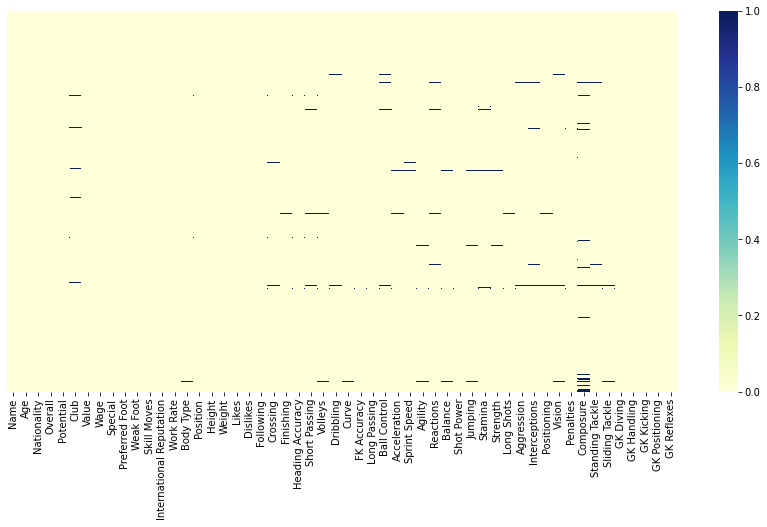

In [22]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), yticklabels=False, cmap='YlGnBu')

The club has no relation with the other features and imputing it wiht any club names will be bias. So i am imputing it with the 'no Club'. We can also see there is an line showing missing values in rows of different features both categorical and numerical. So let's view categorical and numerical variable seperately

Missing Categorical Values Visualisation


<AxesSubplot:>

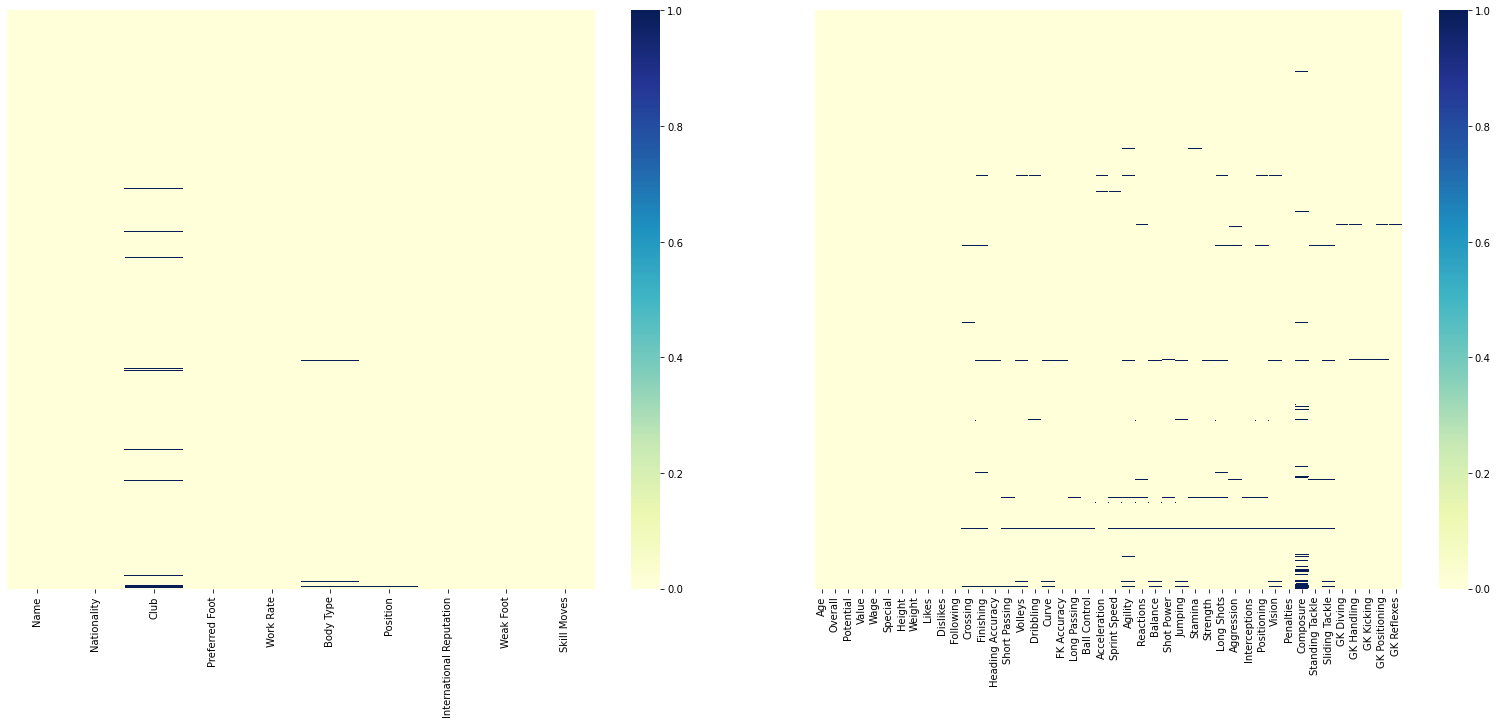

In [23]:
fig = plt.figure(figsize=(100,100))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

ax = fig.add_subplot(7, 7, 1)
sns.heatmap(df[categorical_features].isna(), yticklabels=False, cmap='YlGnBu')

ax = fig.add_subplot(7, 7, 2)
sns.heatmap(df[numerical_features].isna(), yticklabels=False, cmap='YlGnBu')

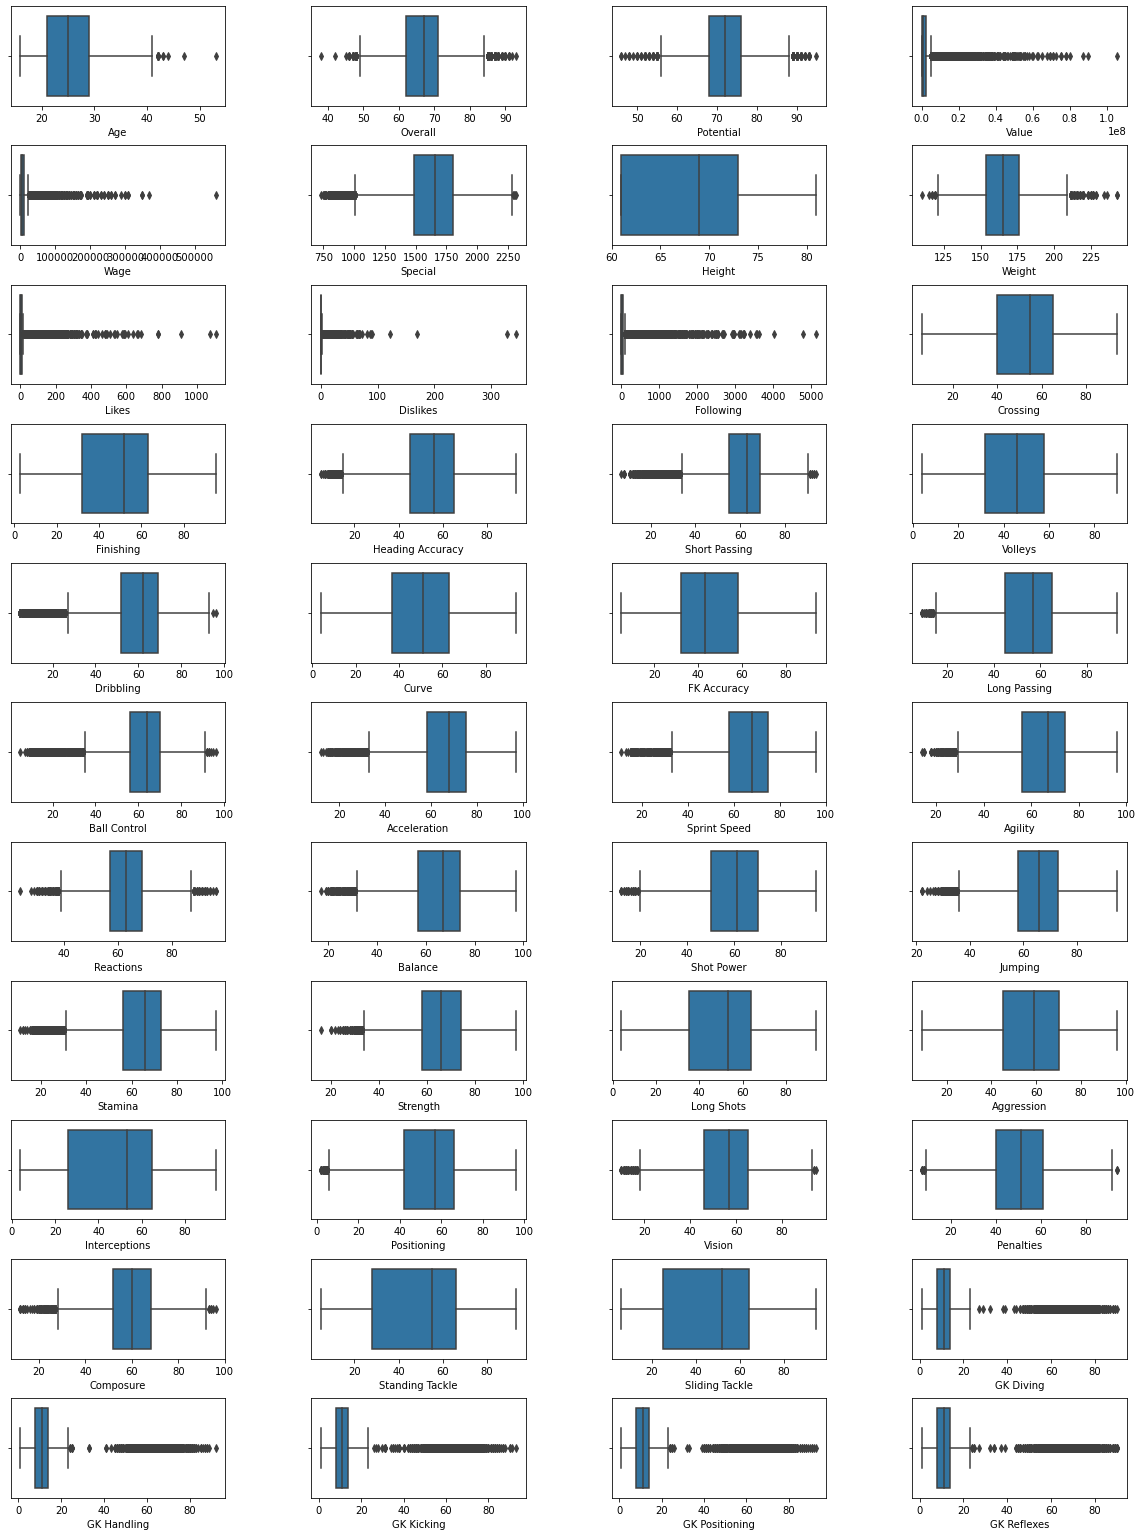

In [24]:
fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count=1
for feature in numerical_features:
    ax = fig.add_subplot(len(numerical_features)//4+1, 4, count)
    sns.boxplot(x = data[feature])
    count +=1

If we try to statistically impute these missing values then it will be biased imputation for many features.

There are many features with outliers so if we try to impute the missing values using any imputer models then model will provide incorrect results.

But if we try to remove these outliers or correct the outliers, then the models will be somewhat provide meaningful results.
But again a question arise weather to remove or correct the outliers??

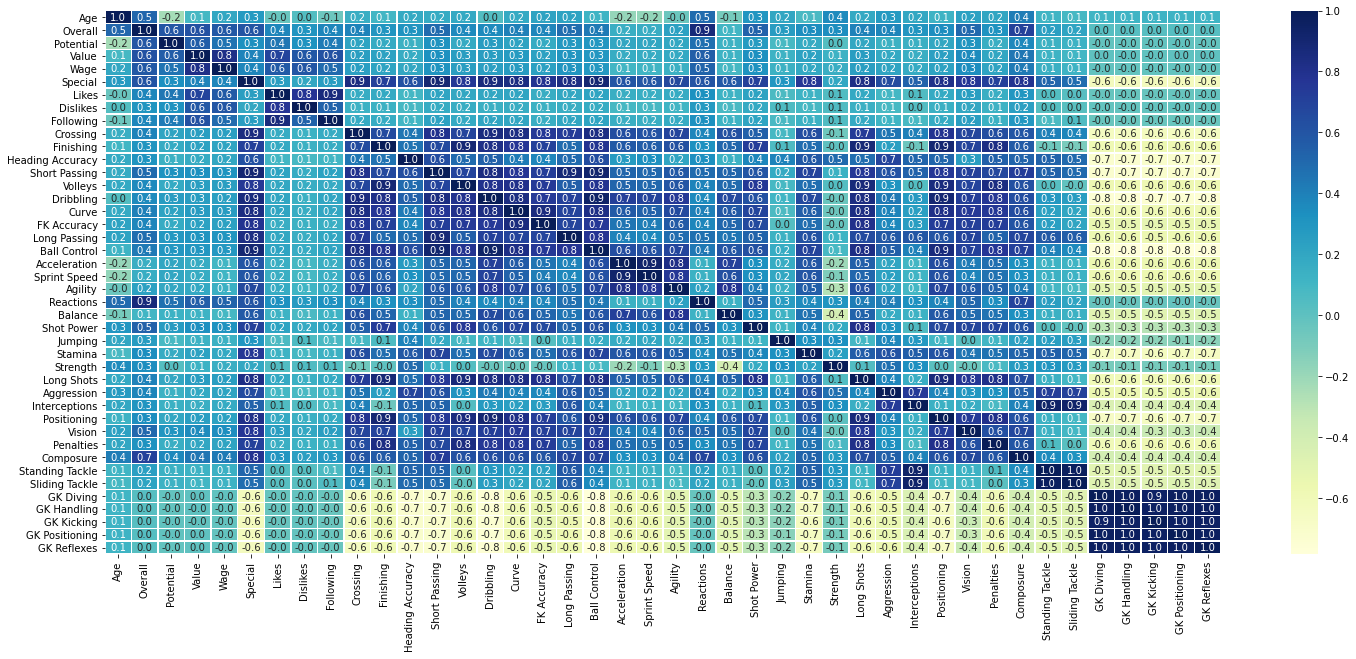

In [25]:
corr_ = df[numerical_features].corr()

f,ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr_,annot=True, linewidths=0.5, cmap="YlGnBu", fmt= '.1f',ax=ax)
plt.show()

We can clearly see from these heatmap that 'Special' feature of the dataset is somewhat strongly correlated with many features which are having missing values.

'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing','BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions','Balance', 'ShotPower','Stamina','LongShots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 'Marking','GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'

Height and Weight doesn't have good correlation with any other features. So we will impute this using some stats imputations technique after getting some visual view of the data below.

Weight is Correlation(-0.7) with
'Balance'

Interception is Correlation(0.9) with
'StandingTackle', 'SlidingTackle'

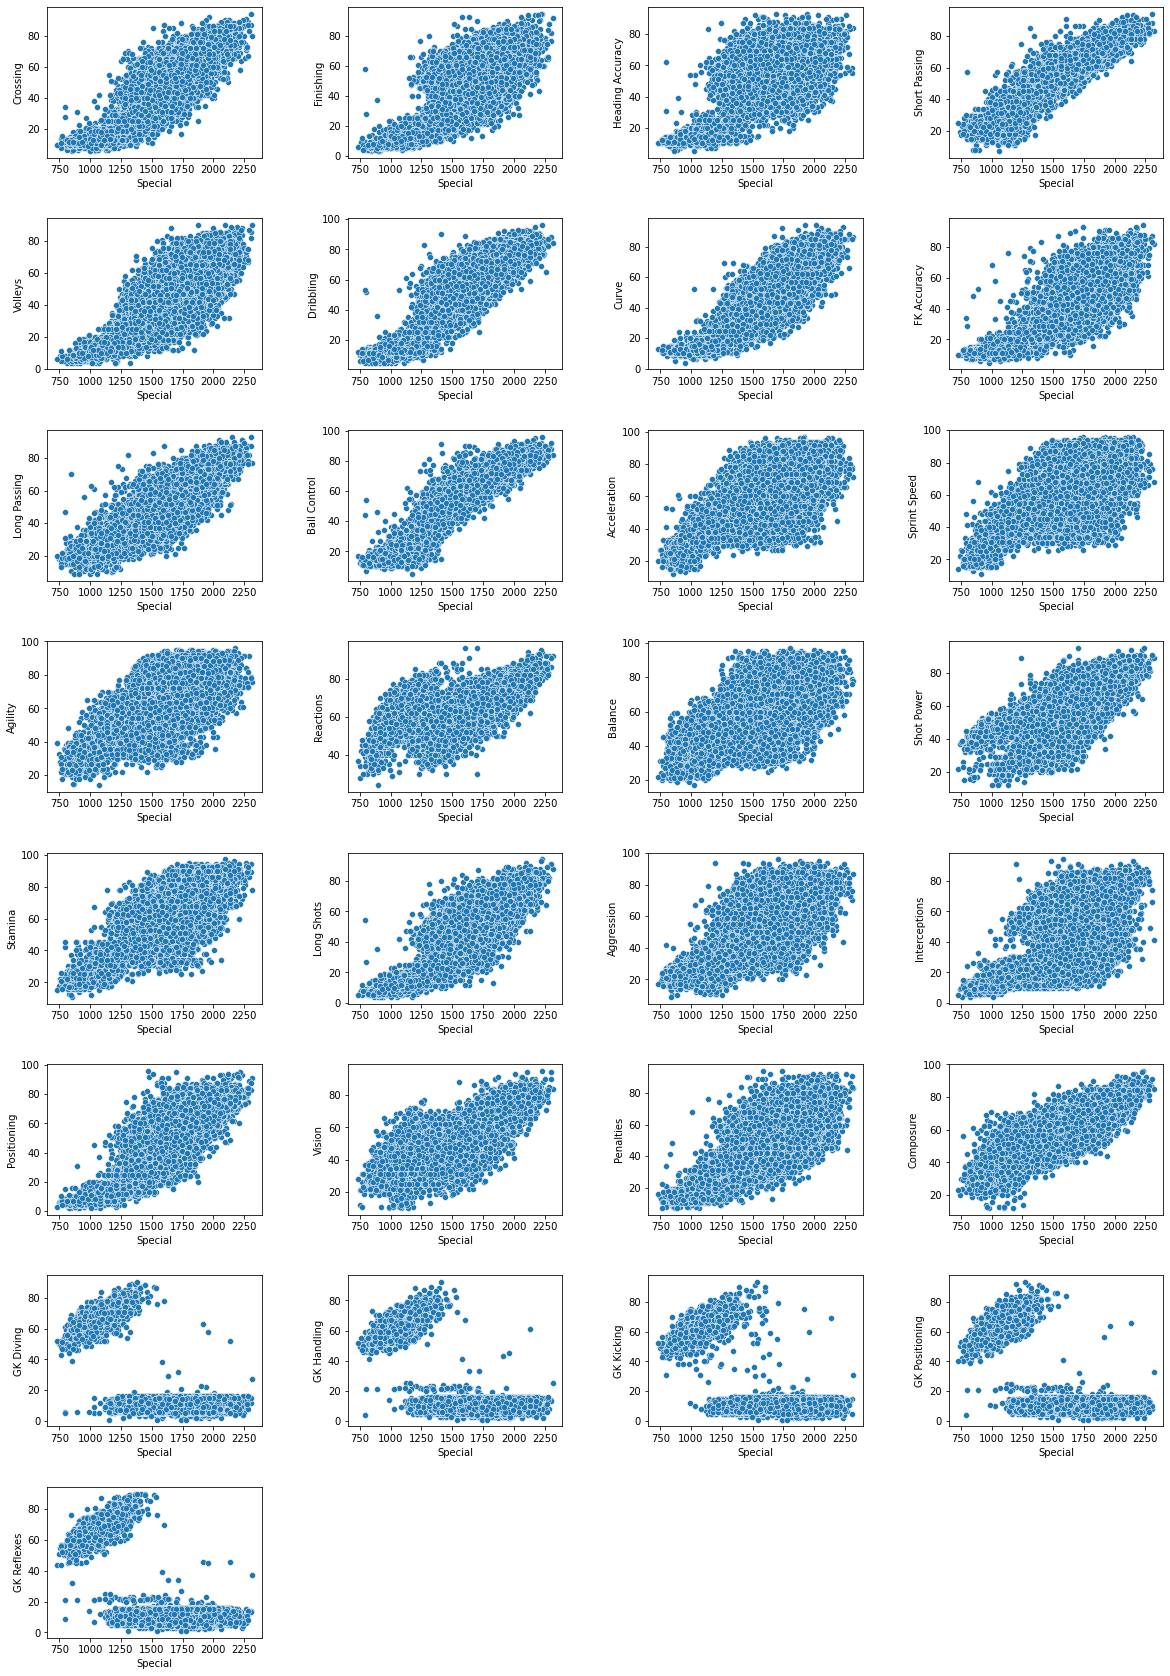

In [26]:
features =  ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing','Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing','Ball Control', 
            'Acceleration', 'Sprint Speed', 'Agility', 'Reactions','Balance', 'Shot Power','Stamina','Long Shots','Aggression', 'Interceptions', 
            'Positioning', 'Vision', 'Penalties','Composure','GK Diving','GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count=1
for feature in features:
    ax = fig.add_subplot(len(features)//4+1, 4, count)
    sns.scatterplot(x=df['Special'], y=df[feature])
    count +=1

We don't see any outliers effecting.



Let's visualise Balance and Weight


<AxesSubplot:xlabel='Balance', ylabel='Weight'>

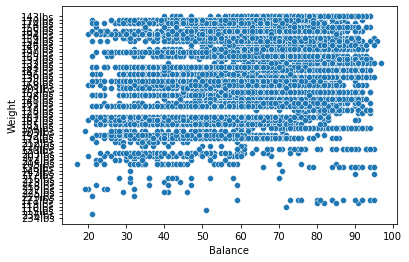

In [27]:
sns.scatterplot(x= 'Balance', y = 'Weight', data = df)


<AxesSubplot:xlabel='Standing Tackle', ylabel='Sliding Tackle'>

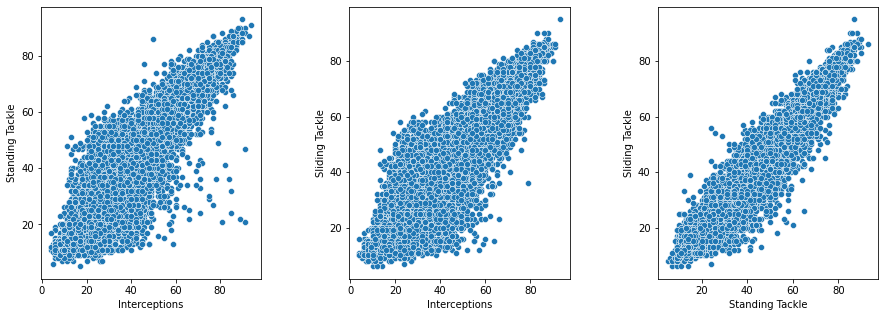

In [28]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
sns.scatterplot(x=df['Interceptions'], y=df['Standing Tackle'])

ax = fig.add_subplot(1, 3, 2)
sns.scatterplot(x=df['Interceptions'], y=df['Sliding Tackle'])

ax = fig.add_subplot(1, 3, 3)
sns.scatterplot(x=df['Standing Tackle'], y=df['Sliding Tackle'])

Let's Visualize Height


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

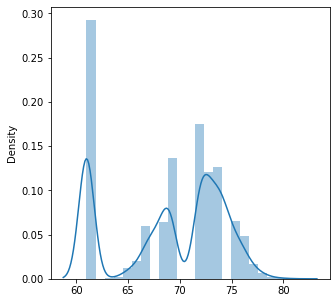

In [29]:
fig = plt.figure(figsize=(5,5))
sns.distplot(x = data['Height'])

## So let's now Impute the the feature using Linear Imputer and KNN Imputer


Before proceeding let's list down what Imputer will be used in which feature


As we can see from above scatter plots in which many features are compaired from 'Special' features. We see a linear relationship except some features('GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'). So these feature can be imputed by Linear Imputation. And we can see features like :- ('GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes') are making 2 group. So we can imputed this by KNN imputation. We can impute the Weights by Balance using Linear Imputation. We can impute the StandingTackle and SlidingTackle by Marking using Linear Imputation. The height will be imputed through Stats imputation techniques.

Splitting train and test data


Let's create a traning and testing set for Linear Imputation and use LinearRegression model to predict the values for features



In [30]:
train_df = data[['Special']+features[:-5]].dropna()
test_df = data[data[['Special']+features[:-5]].isnull().any(axis=1)]

In [31]:
for feature in features[:-5]:
    
    polyreg = make_pipeline(PolynomialFeatures(2),LinearRegression())
    polyreg.fit(X = train_df[['Special']], y = train_df[feature])
    
    predicted_output = polyreg.predict(test_df[['Special']])
    test_df[feature] = np.round(predicted_output)
    df[feature].fillna(test_df[feature], inplace=True)

<ipython-input-31-5b0135118990>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[feature] = np.round(predicted_output)
C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-31-5b0135118990>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

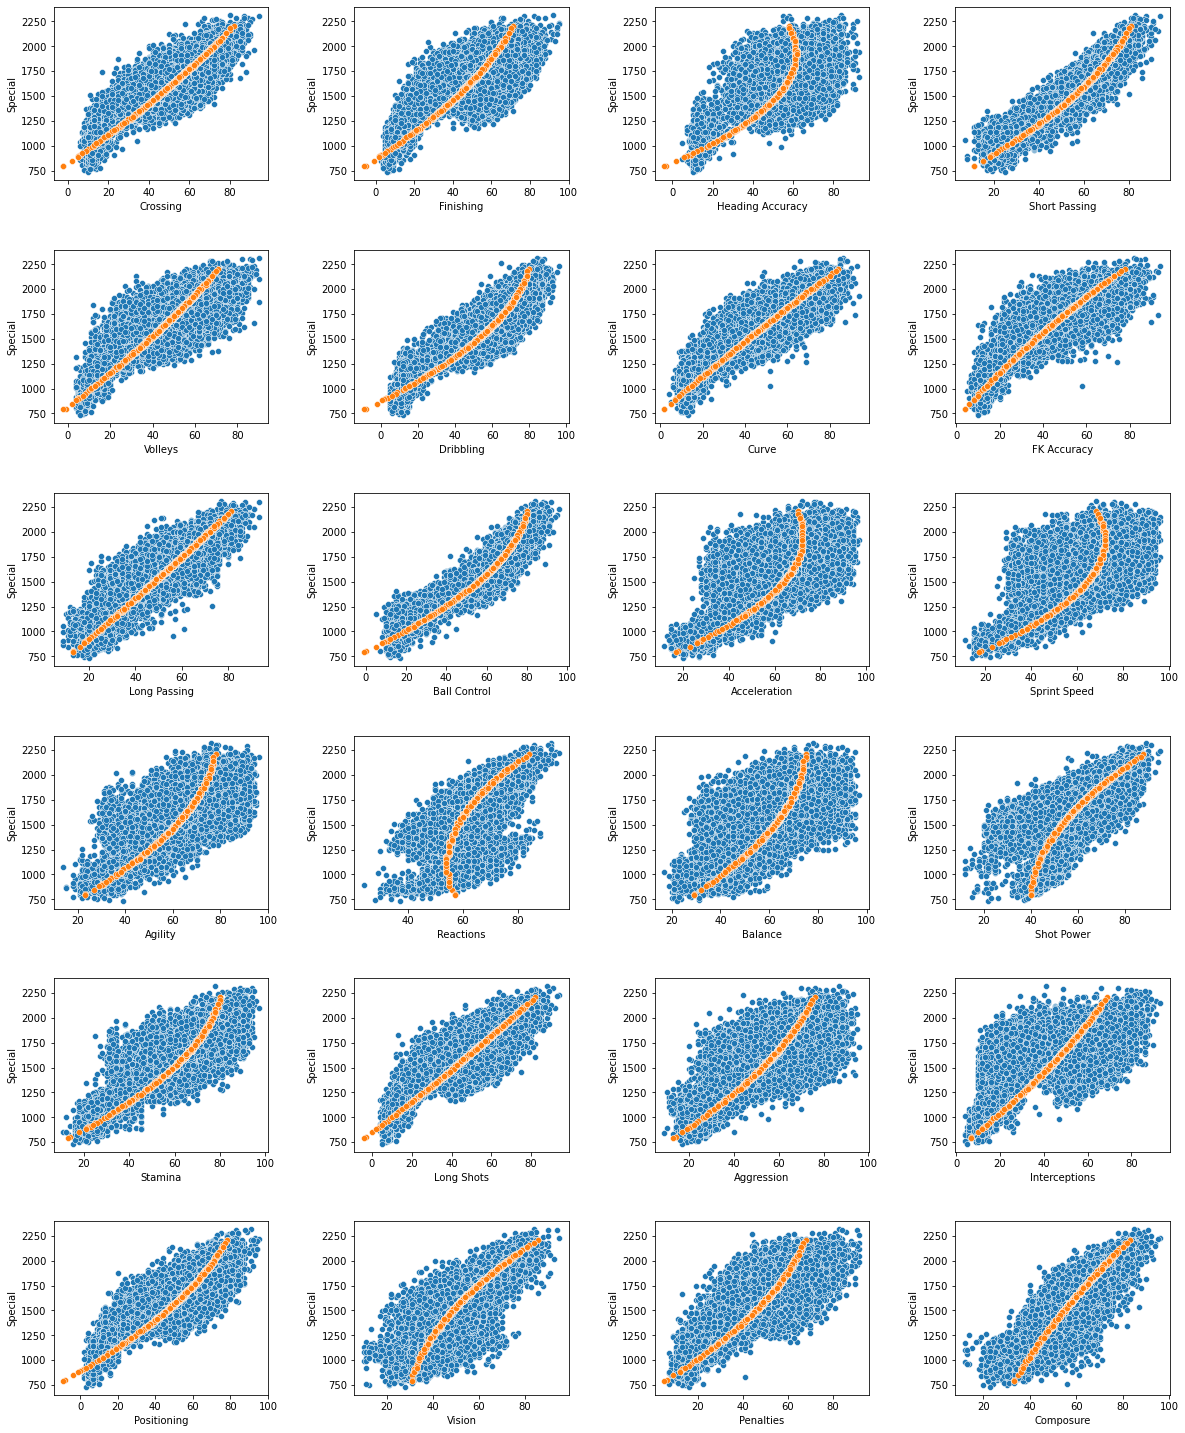

In [32]:
fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count=1
for feature in features[:-5]:
    ax = fig.add_subplot(len(features[:-5])//4+1, 4, count)
    sns.scatterplot(x=train_df[feature], y=train_df['Special'])
    sns.scatterplot(x=test_df[feature], y=test_df['Special'], palette="deep")
    count +=1

As we can see that the imputation is quit good. So let's now do the KNN imputation for remanining numerical variables.



Let's create a traning and testing set for KNN Imputation and use KNNImputer model to predict the values for features


In [33]:
train_df = data[['Special']+features[-5:]].dropna()
test_df = data[data[features[-5:]].isnull().any(axis=1)][['Special']+features[-5:]]

In [34]:
imputer = KNNImputer(n_neighbors=1)
imputer.fit(train_df)
predicted_df = pd.DataFrame(np.round(imputer.transform(test_df)), columns=test_df.columns,index=test_df.index)

In [35]:
for col in test_df.columns[1:]:
    df[col].fillna(predicted_df[col], inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


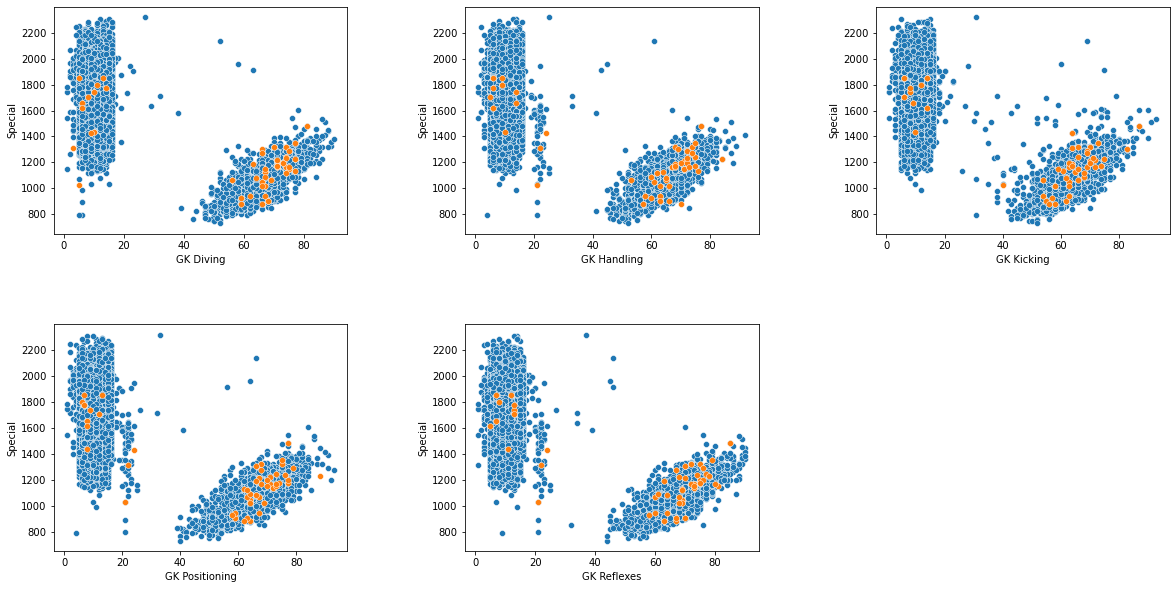

In [36]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count=1
for feature in features[-5:]:
    ax = fig.add_subplot(2, 3, count)
    sns.scatterplot(x=train_df[feature], y=train_df['Special'])
    sns.scatterplot(x=predicted_df[feature], y=predicted_df['Special'])
    count +=1

Let's impute Weight feature by Balance using LinearRegression


In [38]:
train_df = data[['Weight', 'Balance']].dropna()
test_df = data[data['Balance'].isna()][['Weight', 'Balance']]
test_df

,Weight,Balance
960,207,NaN
1086,161,NaN
2369,143,NaN
2373,143,NaN
2535,159,NaN
...,...,...
18524,163,NaN
18525,190,NaN
18528,192,NaN
18535,161,NaN


In [39]:
polyreg=make_pipeline(PolynomialFeatures(1),LinearRegression(1))
polyreg.fit(X = train_df[['Balance']], y = train_df['Weight'])

test_df['Balance'] = np.round(polyreg.predict(test_df[['Weight']]))   #.reshape(-1,1)
test_df

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


,Weight,Balance
960,207,60.0
1086,161,94.0
2369,143,108.0
2373,143,108.0
2535,159,96.0
...,...,...
18524,163,93.0
18525,190,73.0
18528,192,71.0
18535,161,94.0


In [40]:
df['Weight'].fillna(test_df['Weight'], inplace=True)


C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Balance'>

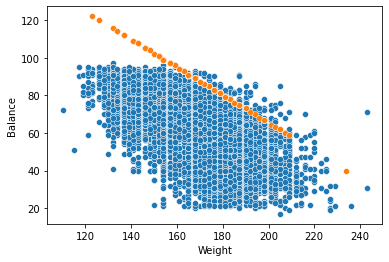

In [41]:
sns.scatterplot(train_df['Weight'], train_df['Balance'])
sns.scatterplot(test_df['Weight'], test_df['Balance'])

In [42]:
train_df = df[['Standing Tackle', 'Sliding Tackle', 'Interceptions']].dropna()
test_df = df[df['Sliding Tackle'].isna()][['Standing Tackle', 'Sliding Tackle', 'Interceptions']]

In [43]:
for feature in ['Standing Tackle', 'Sliding Tackle']:
    polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
    polyreg.fit(X = train_df[['Interceptions']], y = train_df[feature])

    test_df[feature] = np.round(polyreg.predict(test_df[['Interceptions']]))
    df[feature].fillna(test_df[feature], inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\l

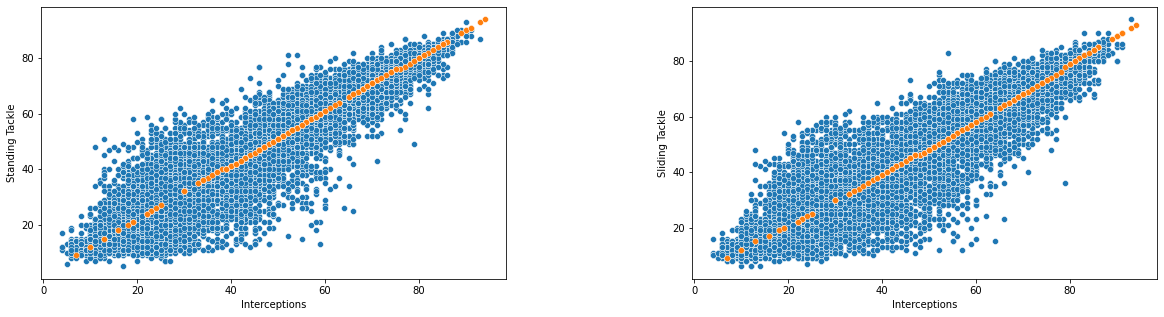

In [44]:
fig = plt.figure(figsize=(20, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
count=1
for feature in ['Standing Tackle', 'Sliding Tackle']:
    ax = fig.add_subplot(1, 2, count)
    sns.scatterplot(train_df['Interceptions'], train_df[feature])
    sns.scatterplot(test_df['Interceptions'], test_df[feature])
    count +=1

In [45]:
df['Height'].fillna(61.0, inplace=True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace=True)
df['Strength'].fillna(df['Strength'].mean(), inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [46]:
df[numerical_features].isna().sum()


Age                  0
Overall              0
Potential            0
Value                0
Wage                 0
Special              0
Height               0
Weight               0
Likes                0
Dislikes             0
Following            0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys              0
Dribbling            0
Curve                0
FK Accuracy          0
Long Passing         0
Ball Control         0
Acceleration         0
Sprint Speed         0
Agility              0
Reactions            0
Balance              0
Shot Power           0
Jumping              0
Stamina              0
Strength             0
Long Shots           0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Standing Tackle     44
Sliding Tackle       0
GK Diving            0
GK Handling          0
GK Kicking           0
GK Positioning       0
GK Reflexes

In [47]:
for feature in ['Standing Tackle']:
    polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
    polyreg.fit(X = train_df[['Interceptions']], y = train_df[feature])

    test_df[feature] = np.round(polyreg.predict(test_df[['Interceptions']]))
    df[feature].fillna(test_df[feature], inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [48]:
df['Standing Tackle'].fillna(df['Standing Tackle'].mean(), inplace=True)



In [49]:
df[numerical_features].isna().sum()


Age                 0
Overall             0
Potential           0
Value               0
Wage                0
Special             0
Height              0
Weight              0
Likes               0
Dislikes            0
Following           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Standing Tackle     0
Sliding Tackle      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
dtype: int64

## As all the Numerical features are been imputed. Let's fill the Categorical features

### Let's first visualise the category features distribution.


In [50]:
df[categorical_features].isna().sum()


Name                          0
Nationality                   0
Club                        371
Preferred Foot                0
Work Rate                     0
Body Type                    51
Position                     25
International Reputation      0
Weak Foot                     0
Skill Moves                   0
dtype: int64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Position', ylabel='count'>

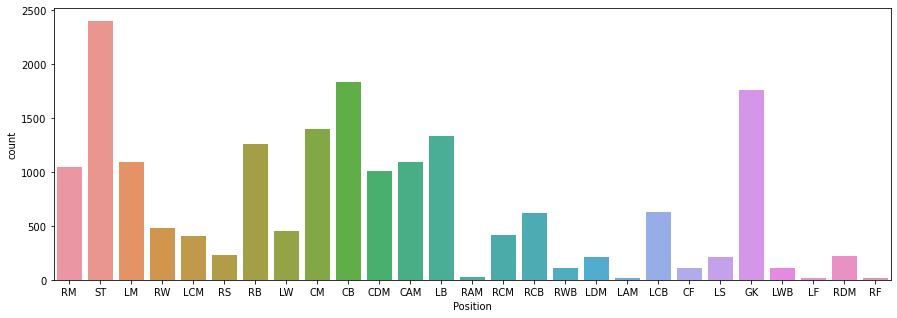

In [51]:
fig = plt.figure(figsize=(15,5))
sns.countplot(df['Position'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body Type', ylabel='count'>

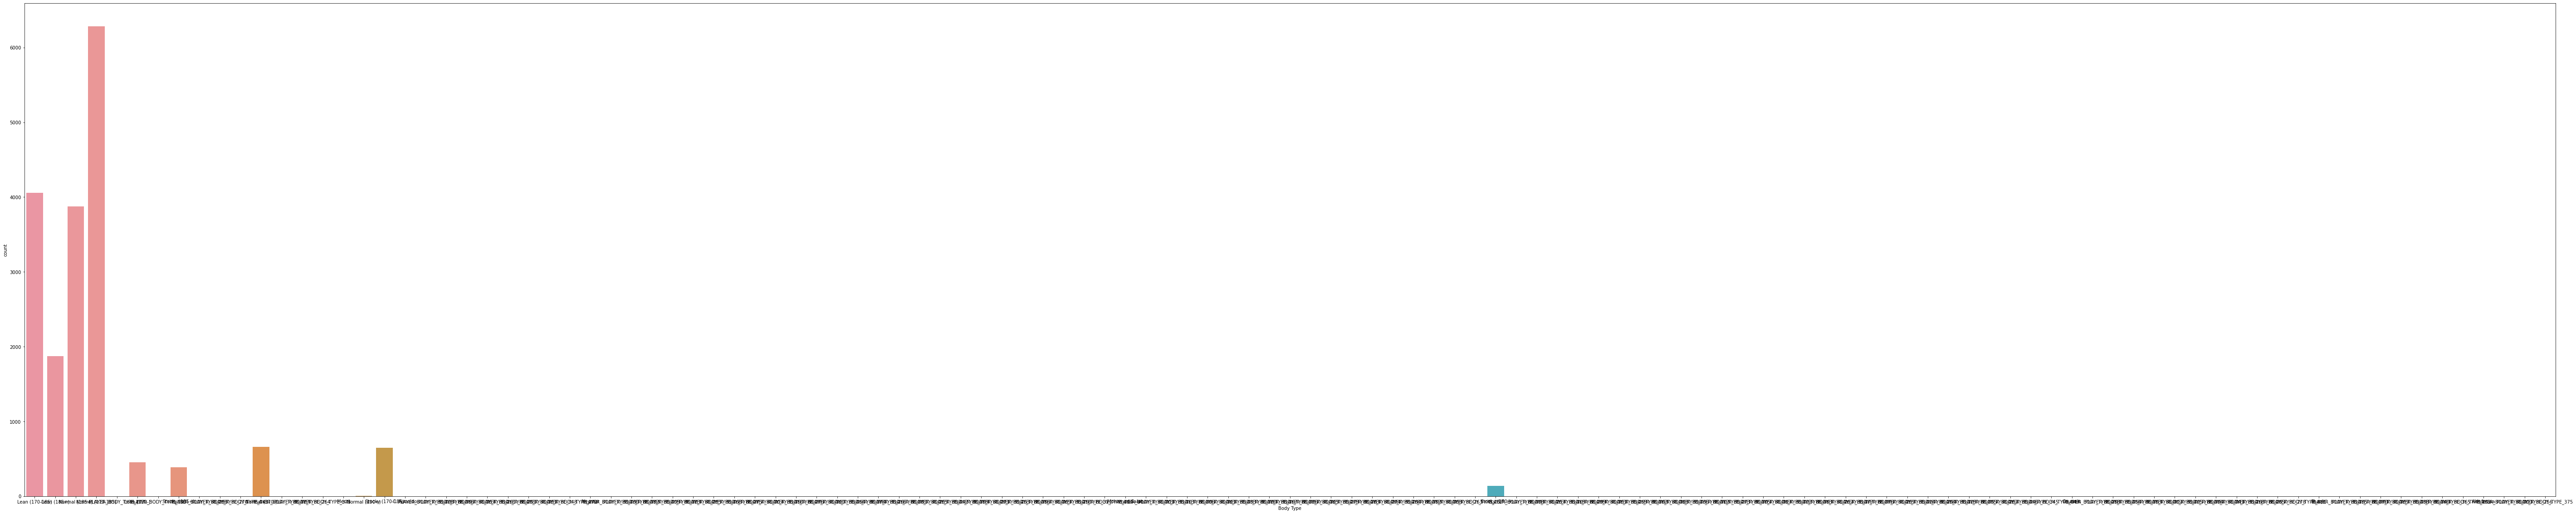

In [52]:
fig = plt.figure(figsize=(100,20))
sns.countplot(df['Body Type'])

### Imputing some Categorical variable by viewing the graphs above.

In [53]:
df['Club'].fillna('No Club', inplace=True)
df['Body Type'].fillna('Normal',inplace=True)
df['Position'].fillna('NA', inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### After all imputations let's visualise the Dataset using Heatmap

<AxesSubplot:>

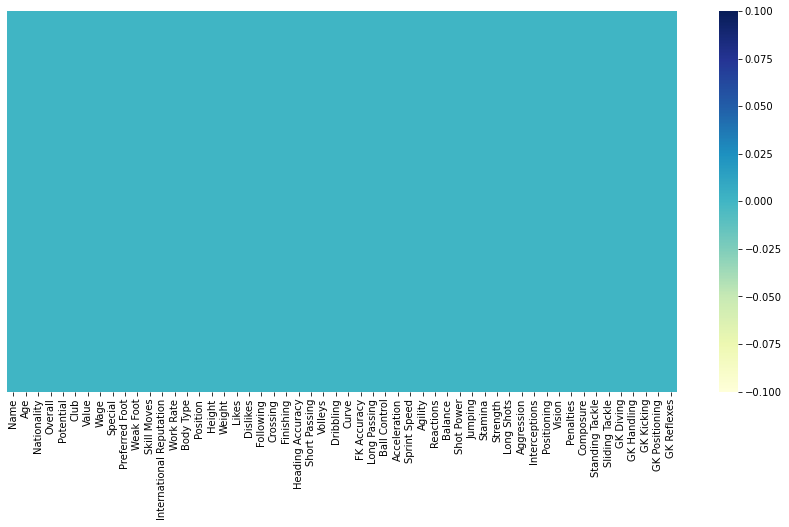

In [54]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), yticklabels=False, cmap='YlGnBu')


In [55]:
df.isna().sum()


Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
Weak Foot                   0
Skill Moves                 0
International Reputation    0
Work Rate                   0
Body Type                   0
Position                    0
Height                      0
Weight                      0
Likes                       0
Dislikes                    0
Following                   0
Crossing                    0
Finishing                   0
Heading Accuracy            0
Short Passing               0
Volleys                     0
Dribbling                   0
Curve                       0
FK Accuracy                 0
Long Passing                0
Ball Control                0
Acceleration                0
Sprint Speed                0
Agility   

In [56]:
df.to_csv('fifa21_clean.csv',index=False)
